# Shopping Trends Analysis

### Import `libraries/modules` for analysis 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import and store the `shopping_trends_updated.csv` file in a variable with `*Customer ID*` column as the index column

In [31]:
shop_trend_df = pd.read_csv ("shopping_trends_updated.csv" , index_col= "Customer ID")
shop_trend_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Display new DataFrame information to determine how many entries, columns and null values are present

In [32]:
shop_trend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

### Check for duplicate rows within the DataFrame

In [33]:
shop_trend_df.duplicated().sort_values()

Customer ID
1       False
2593    False
2594    False
2595    False
2596    False
        ...  
1306    False
1307    False
1308    False
1280    False
3900    False
Length: 3900, dtype: bool

### Remove any outliers from DataFrame

In [34]:
sorted_shop_trend_df = shop_trend_df.sort_values("Purchase Amount (USD)", ascending=False)
sorted_shop_trend_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
2843,28,Female,Coat,Outerwear,100,Arizona,L,Green,Fall,4.3,No,Standard,No,No,48,Debit Card,Quarterly
96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,Free Shipping,Yes,Yes,48,PayPal,Monthly
582,32,Male,Sweater,Clothing,100,Iowa,XL,Charcoal,Winter,2.7,Yes,Store Pickup,Yes,Yes,12,Bank Transfer,Every 3 Months
1422,68,Male,Dress,Clothing,100,Pennsylvania,S,Gold,Spring,3.0,No,Standard,Yes,Yes,24,Bank Transfer,Fortnightly
3838,45,Female,Hoodie,Clothing,100,New Mexico,M,Green,Spring,4.8,No,Free Shipping,No,No,33,Bank Transfer,Fortnightly


In [35]:
sorted_shop_trend_df = shop_trend_df.sort_values("Purchase Amount (USD)")
sorted_shop_trend_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
2697,57,Female,Coat,Outerwear,20,South Dakota,M,White,Spring,4.7,No,Free Shipping,No,No,12,Debit Card,Monthly
3654,67,Female,Coat,Outerwear,20,Minnesota,M,Blue,Spring,3.9,No,Next Day Air,No,No,39,Credit Card,Fortnightly
3084,22,Female,Pants,Clothing,20,Illinois,S,Purple,Summer,3.5,No,Store Pickup,No,No,28,PayPal,Quarterly
2653,23,Female,Shorts,Clothing,20,Maryland,L,Cyan,Summer,3.3,No,2-Day Shipping,No,No,46,Credit Card,Monthly
1796,68,Male,Jeans,Clothing,20,Wisconsin,S,Violet,Fall,4.0,No,2-Day Shipping,No,No,9,Debit Card,Fortnightly


## Data Visualization with Matplotlib

##  Visualize the **frequency of Item Purchased**, to determine which items are most commonly purchased

### Determine the frequency of items purchased

In [36]:
item_purchase_frequency = shop_trend_df ["Item Purchased"].value_counts()
item_purchase_frequency

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

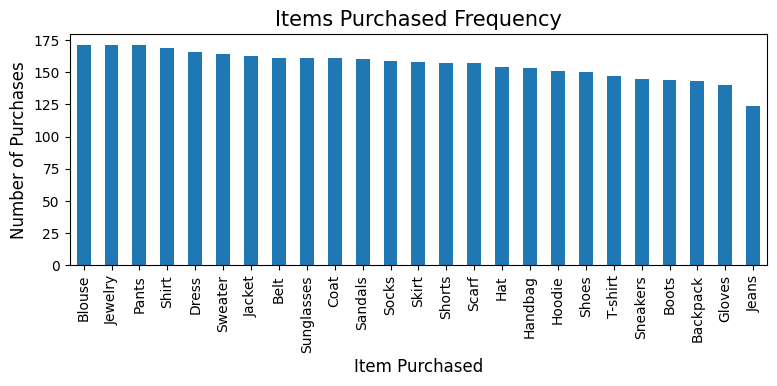

In [37]:
item_purchase_frequency.plot.bar (figsize = (9,3));
plt.title ("Items Purchased Frequency", fontsize = 15);
plt.xlabel ("Item Purchased", fontsize = 12);
plt.ylabel ("Number of Purchases", fontsize = 12);

### Determine the **frequency of gender purchases**

In [38]:
gender_purchase_frequency = shop_trend_df ["Gender"].value_counts()
gender_purchase_frequency

Male      2652
Female    1248
Name: Gender, dtype: int64

### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

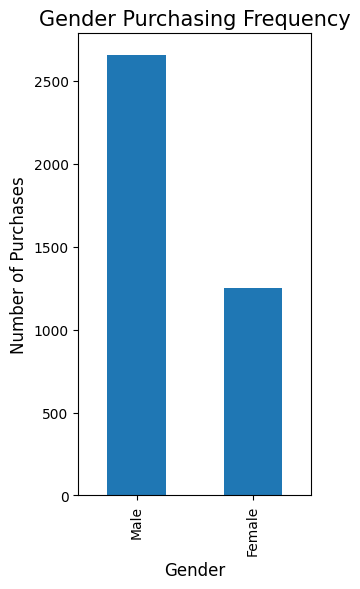

In [39]:
gender_purchase_frequency.plot.bar (figsize = (3,6));
plt.title ("Gender Purchasing Frequency" , fontsize = 15);
plt.xlabel ("Gender" , fontsize = 12);
plt.ylabel ("Number of Purchases" , fontsize = 12);

### Determine the frequency of ***Item Purchased*** by ***male Gender***

In [40]:
male_purchase_items = shop_trend_df[(shop_trend_df["Gender"] == "Male") | (shop_trend_df["Gender"] == "Female")]
male_purchase_items.groupby(["Item Purchased", "Gender"]).size().unstack()


Gender,Female,Male
Item Purchased,,
Backpack,37,106
Belt,55,106
Blouse,66,105
Boots,50,94
Coat,47,114
Dress,52,114
Gloves,37,103
Handbag,58,95
Hat,52,102


### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

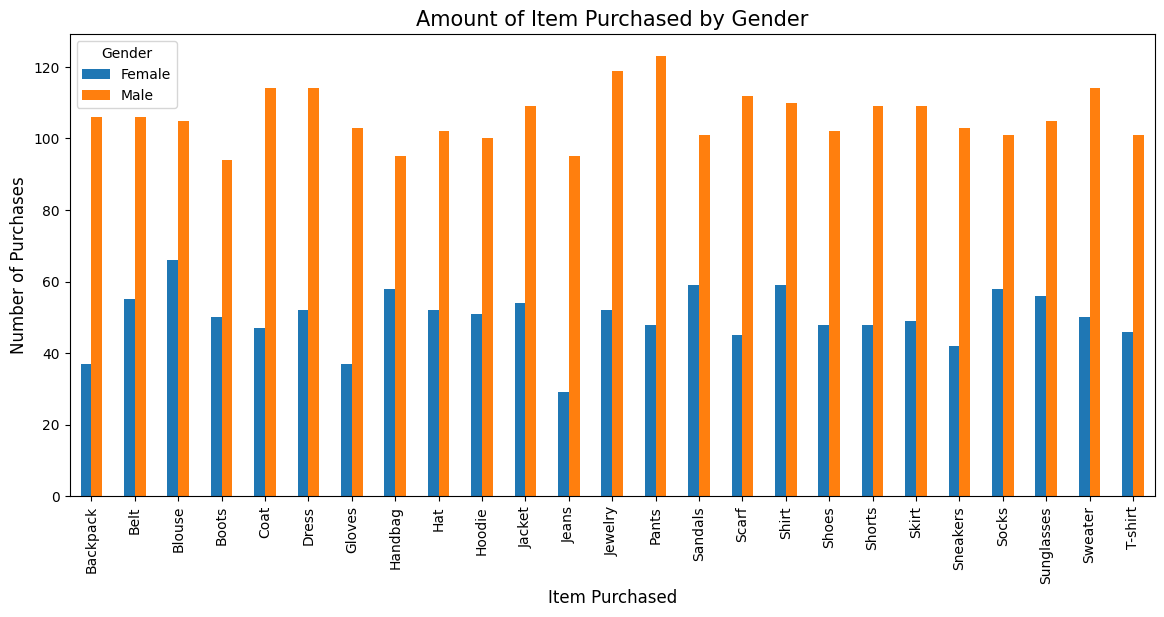

In [41]:
male_purchase_items = shop_trend_df[(shop_trend_df["Gender"] == "Male") | (shop_trend_df["Gender"] == "Female")]
male_purchase_items.groupby(["Item Purchased", "Gender"]).size().unstack().plot.bar(figsize = (14,6));
plt.title ("Amount of Item Purchased by Gender" , fontsize = 15);
plt.xlabel ("Item Purchased" , fontsize = 12);
plt.ylabel ("Number of Purchases" , fontsize = 12);

### Determine the **frequency of previous purchases**

In [42]:
previous_purchase_frequency = shop_trend_df ["Previous Purchases"].value_counts().sort_values()
previous_purchase_frequency

49    58
35    63
43    64
9     65
22    65
7     65
17    67
8     67
13    69
29    69
38    70
16    70
41    70
36    71
2     72
44    72
23    73
15    73
10    76
50    77
26    77
46    78
37    78
27    78
19    78
25    79
12    79
34    79
28    80
32    81
39    81
40    82
33    82
11    82
30    82
45    83
20    83
1     83
42    83
18    84
6     87
5     87
47    90
48    90
4     91
3     91
24    91
14    92
21    96
31    97
Name: Previous Purchases, dtype: int64

### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

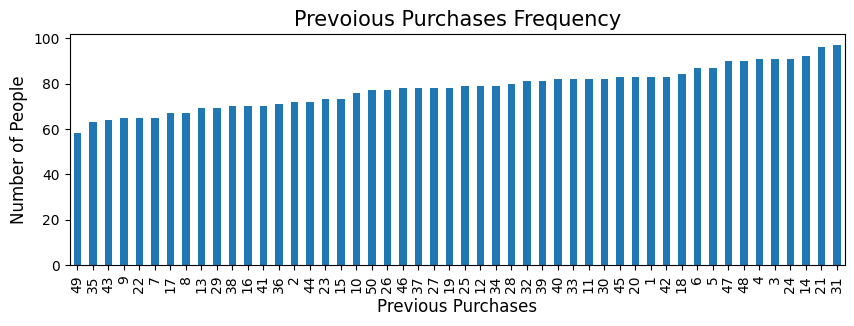

In [43]:
previous_purchase_frequency.plot.bar (figsize = (10,3));
plt.title ("Prevoious Purchases Frequency", fontsize = 15);
plt.xlabel ("Previous Purchases", fontsize = 12);
plt.ylabel ("Number of People", fontsize = 12);

### Determine the **frequency of previous purchases by which gender** and order from least to most purchases

In [44]:
previous_purchase_by_gender = shop_trend_df[(shop_trend_df["Gender"] == "Male") | (shop_trend_df["Gender"] == "Female")]
previous_purchase_by_gender.groupby(["Previous Purchases", "Gender"]).size().unstack()

Gender,Female,Male
Previous Purchases,,
1,27,56
2,28,44
3,36,55
4,33,58
5,33,54
6,25,62
7,25,40
8,15,52
9,24,41


### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

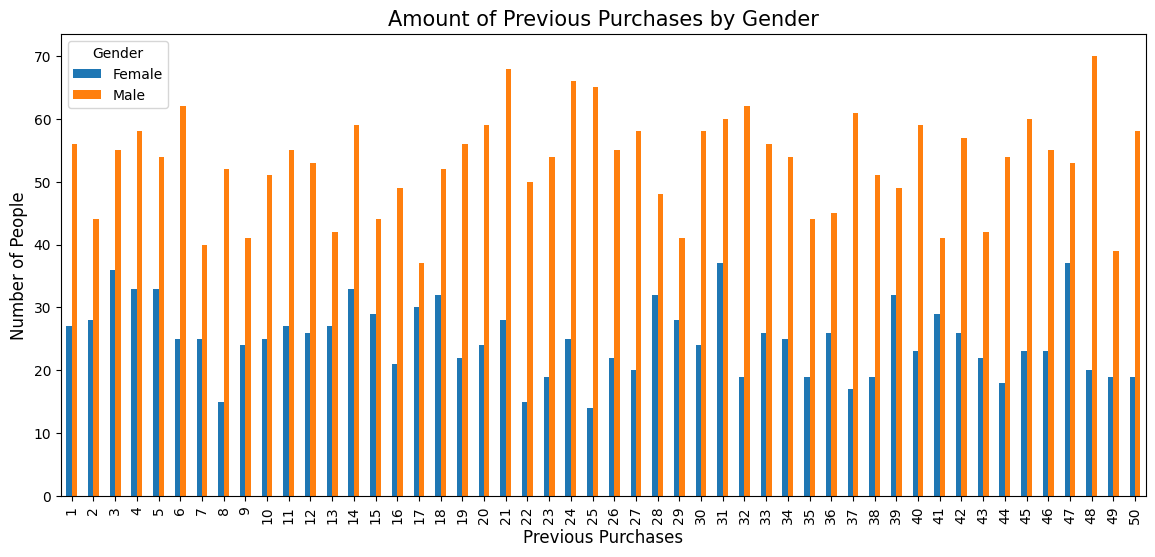

In [45]:
previous_purchase_by_gender = shop_trend_df[(shop_trend_df["Gender"] == "Male") | (shop_trend_df["Gender"] == "Female")]
previous_purchase_by_gender.groupby(["Previous Purchases", "Gender"]).size().unstack().plot.bar(figsize = (14,6));
plt.title ("Amount of Previous Purchases by Gender" , fontsize = 15);
plt.xlabel ("Previous Purchases" , fontsize = 12);
plt.ylabel ("Number of People" , fontsize = 12);

### Determine the **frequency of Purchase Locations** and order from least to most purchases

In [46]:
location_purchase_frequency = shop_trend_df ["Location"].value_counts().sort_values()
location_purchase_frequency

Rhode Island      63
Kansas            63
Hawaii            65
Arizona           65
New Jersey        67
Florida           68
Iowa              69
South Dakota      70
New Hampshire     71
Utah              71
Wyoming           71
Massachusetts     72
Alaska            72
Washington        73
Michigan          73
Pennsylvania      74
Oregon            74
Wisconsin         75
Oklahoma          75
Colorado          75
South Carolina    76
Maine             77
Texas             77
Tennessee         77
Ohio              77
Virginia          77
North Carolina    78
Connecticut       78
Arkansas          79
Kentucky          79
Georgia           79
Indiana           79
Mississippi       80
New Mexico        81
West Virginia     81
Missouri          81
North Dakota      83
Louisiana         84
Vermont           85
Maryland          86
Delaware          86
Nevada            87
New York          87
Nebraska          87
Minnesota         88
Alabama           89
Illinois          92
Idaho        

### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

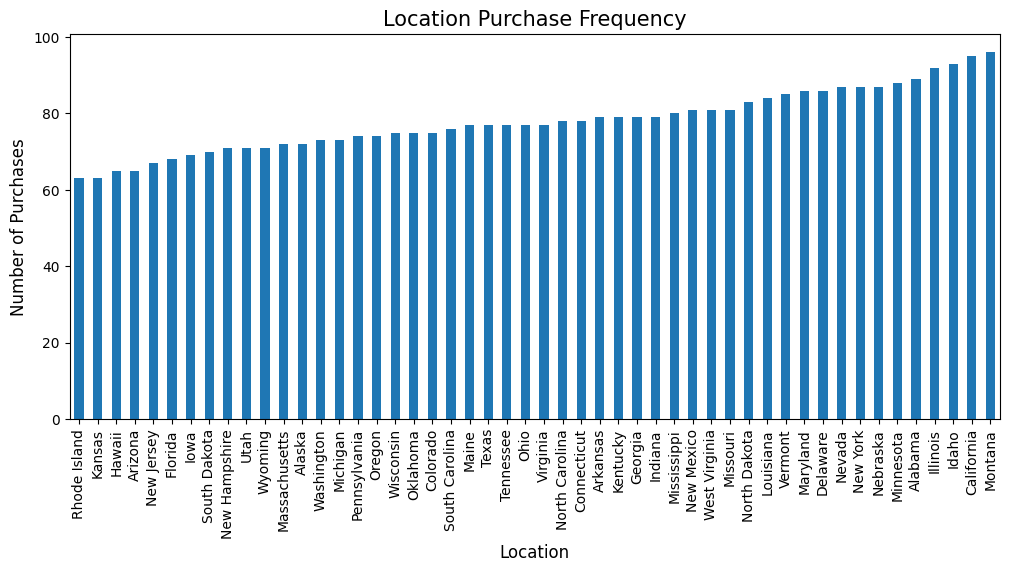

In [47]:
location_purchase_frequency.plot.bar (figsize = (12,5));
plt.title ("Location Purchase Frequency", fontsize = 15);
plt.xlabel ("Location", fontsize = 12);
plt.ylabel ("Number of Purchases", fontsize = 12);

### Determine the **frequency of location purchases by gender** and order from least to most purchases

In [48]:
location_purchases_by_gender = shop_trend_df[(shop_trend_df["Gender"] == "Male") | (shop_trend_df["Gender"] == "Female")]
location_purchases_by_gender.groupby(["Location", "Gender"]).size().unstack()

Gender,Female,Male
Location,,
Alabama,27,62
Alaska,24,48
Arizona,25,40
Arkansas,25,54
California,29,66
Colorado,26,49
Connecticut,27,51
Delaware,25,61
Florida,20,48


### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

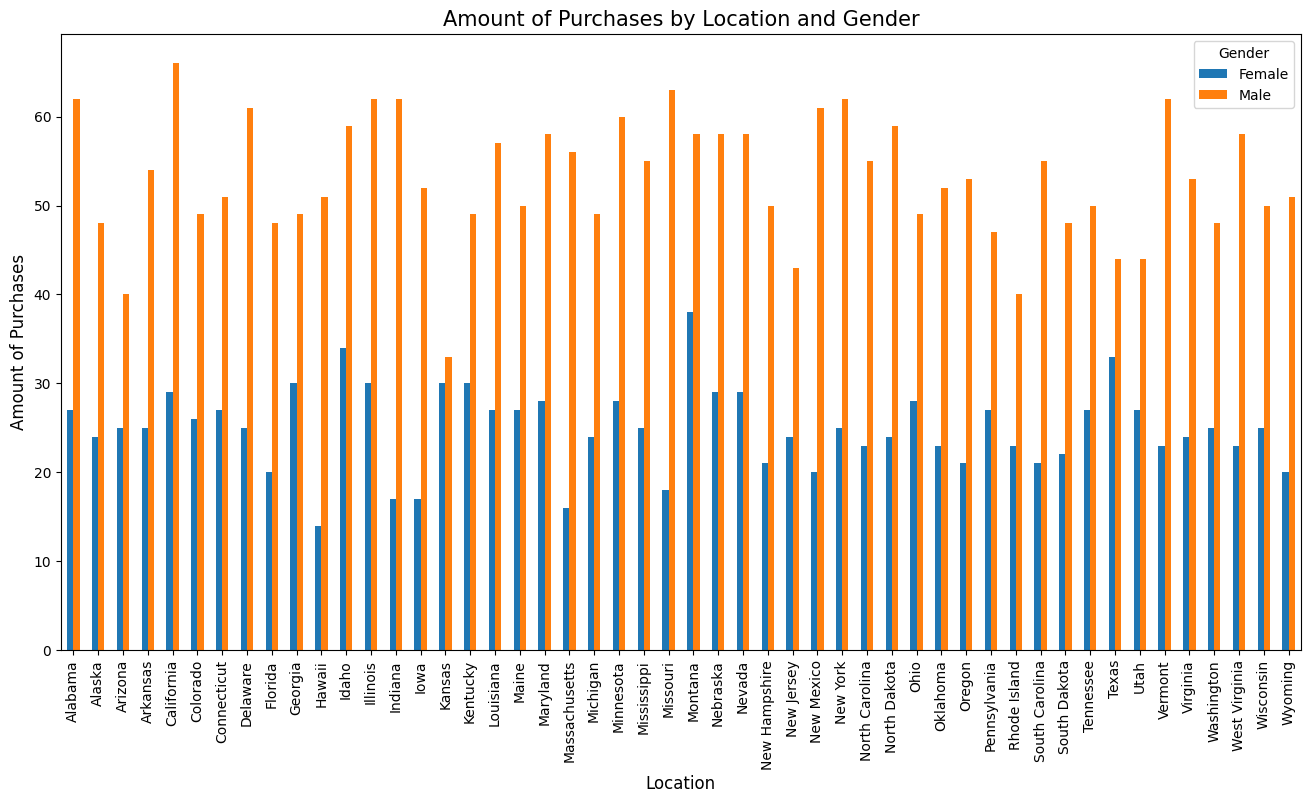

In [49]:
previous_purchase_by_gender_location = shop_trend_df[(shop_trend_df["Gender"] == "Male") | (shop_trend_df["Gender"] == "Female")]
previous_purchase_by_gender_location.groupby(["Location", "Gender"]).size().unstack().plot.bar(figsize = (16,8));
plt.title ("Amount of Purchases by Location and Gender" , fontsize = 15);
plt.xlabel ("Location" , fontsize = 12);
plt.ylabel ("Amount of Purchases" , fontsize = 12);

### Determine the **frequency of Item Purchased by Gender in Montana** 

#### Determine **All Purchases in Montana**

In [50]:
montana_purchase = shop_trend_df[(shop_trend_df["Location"] == "Montana")]
montana_purchase

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
19,52,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
48,55,Male,Jewelry,Accessories,54,Montana,M,Charcoal,Winter,4.5,Yes,Free Shipping,Yes,Yes,36,Cash,Weekly
109,70,Male,Socks,Clothing,79,Montana,L,Purple,Spring,3.4,Yes,Next Day Air,Yes,Yes,32,Bank Transfer,Bi-Weekly
134,52,Male,Sweater,Clothing,65,Montana,M,Violet,Winter,2.5,Yes,Next Day Air,Yes,Yes,25,Venmo,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,23,Female,Pants,Clothing,42,Montana,L,Black,Summer,4.0,No,Store Pickup,No,No,34,Bank Transfer,Weekly
3827,50,Female,Jacket,Outerwear,31,Montana,M,Gray,Summer,4.0,No,Express,No,No,25,Bank Transfer,Annually
3828,62,Female,Jewelry,Accessories,73,Montana,M,Red,Summer,4.1,No,Standard,No,No,47,Cash,Fortnightly


### Determine **amount of each Item Purchased in Montana**

In [51]:
montana_items_purchased = montana_purchase["Item Purchased"].value_counts()
montana_items_purchased

Coat          8
Sweater       7
Socks         6
Jeans         6
Handbag       6
Backpack      5
Shirt         4
Gloves        4
Shorts        4
Belt          4
Boots         4
T-shirt       4
Pants         4
Sandals       4
Dress         3
Scarf         3
Hoodie        3
Jacket        3
Shoes         2
Sunglasses    2
Hat           2
Skirt         2
Jewelry       2
Sneakers      2
Blouse        2
Name: Item Purchased, dtype: int64

### Determine the amount of **each Item Purchased by Gender in Montana**

In [52]:
items_purchased_by_gender_montana = montana_purchase[(montana_purchase["Gender"] == "Male") | (montana_purchase["Gender"] == "Female")]
items_purchased_by_gender_montana.groupby(["Item Purchased", "Gender"]).size().unstack()

Gender,Female,Male
Item Purchased,,
Backpack,2.0,3.0
Belt,1.0,3.0
Blouse,1.0,1.0
Boots,NaN,4.0
Coat,2.0,6.0
Dress,2.0,1.0
Gloves,3.0,1.0
Handbag,2.0,4.0
Hat,NaN,2.0


### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

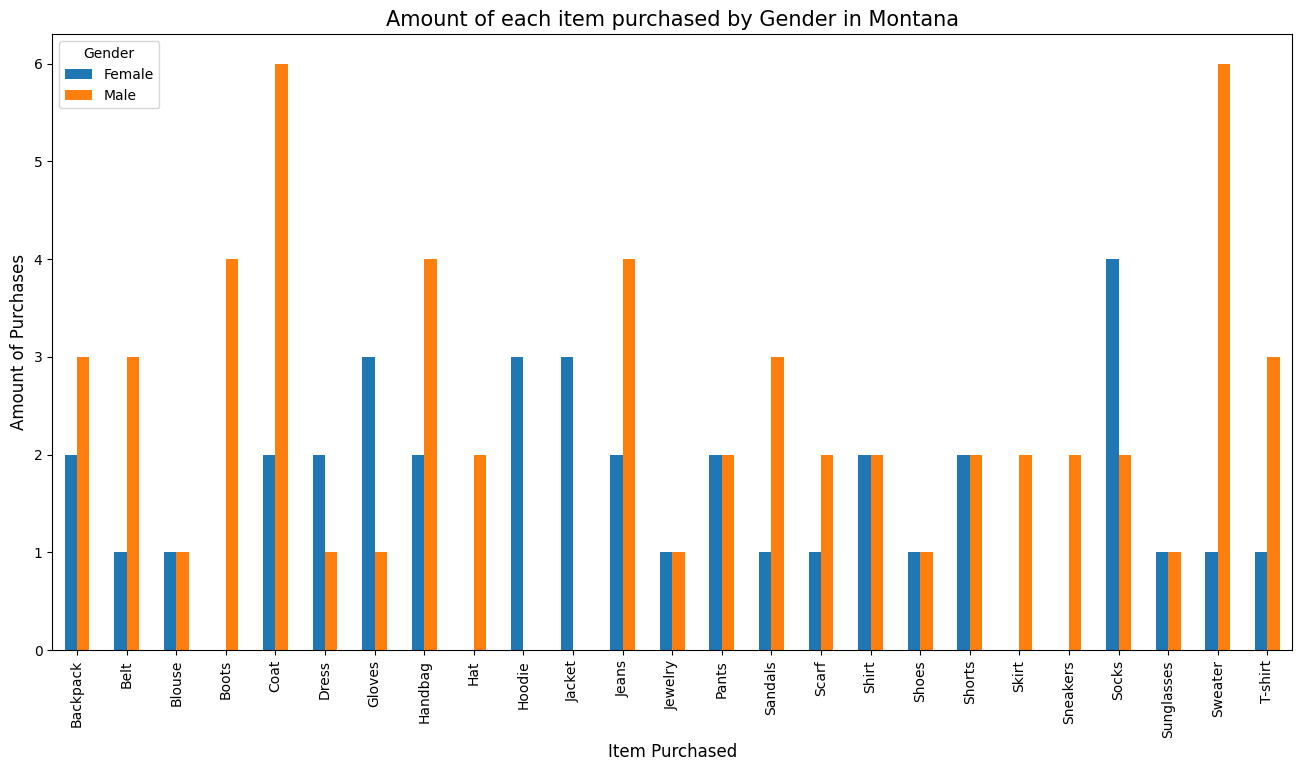

In [53]:
items_purchased_by_gender_montana = montana_purchase[(montana_purchase["Gender"] == "Male") | (montana_purchase["Gender"] == "Female")]
items_purchased_by_gender_montana.groupby(["Item Purchased", "Gender"]).size().unstack().plot.bar(figsize = (16,8));
plt.title ("Amount of each item purchased by Gender in Montana" , fontsize = 15);
plt.xlabel ("Item Purchased" , fontsize = 12);
plt.ylabel ("Amount of Purchases" , fontsize = 12);

### Determine the **frequency of Item Purchased by Gender in Kansas** 

#### Determine **All Purchases in Kansas**

In [54]:
kansas_purchase = shop_trend_df[(shop_trend_df["Location"] == "Kansas")]
kansas_purchase

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
33,36,Male,Jacket,Outerwear,67,Kansas,M,Silver,Summer,4.9,Yes,Free Shipping,Yes,Yes,37,Venmo,Annually
136,43,Male,Sandals,Footwear,81,Kansas,M,Purple,Fall,4.1,Yes,Express,Yes,Yes,12,PayPal,Quarterly
178,21,Male,Hoodie,Clothing,42,Kansas,L,Magenta,Fall,3.7,Yes,Next Day Air,Yes,Yes,47,Bank Transfer,Monthly
321,66,Male,Jewelry,Accessories,72,Kansas,L,White,Summer,4.9,Yes,Standard,Yes,Yes,28,Debit Card,Quarterly
335,41,Male,Blouse,Clothing,46,Kansas,M,Lavender,Fall,2.6,Yes,Next Day Air,Yes,Yes,30,Credit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,26,Female,Sandals,Footwear,55,Kansas,M,Green,Spring,4.0,No,Store Pickup,No,No,17,Cash,Bi-Weekly
3789,43,Female,Hat,Accessories,65,Kansas,XL,Teal,Spring,3.2,No,Next Day Air,No,No,27,Debit Card,Monthly
3823,70,Female,Hat,Accessories,41,Kansas,S,Gold,Spring,3.2,No,Free Shipping,No,No,17,PayPal,Every 3 Months


### Determine **amount of each Item Purchased in Kansas**

In [55]:
kansas_items_purchased = kansas_purchase["Item Purchased"].value_counts()
kansas_items_purchased

Blouse        6
Sandals       6
Jewelry       5
Boots         5
T-shirt       4
Jacket        3
Hat           3
Coat          3
Shirt         3
Shorts        3
Sneakers      3
Pants         3
Socks         3
Sunglasses    3
Dress         2
Belt          2
Hoodie        2
Scarf         2
Gloves        1
Backpack      1
Name: Item Purchased, dtype: int64

### Determine the amount of **each Item Purchased by Gender in Kansas**

In [56]:
items_purchased_by_gender_kansas = kansas_purchase[(kansas_purchase["Gender"] == "Male") | (kansas_purchase["Gender"] == "Female")]
items_purchased_by_gender_kansas.groupby(["Item Purchased", "Gender"]).size().unstack()

Gender,Female,Male
Item Purchased,,
Backpack,1.0,NaN
Belt,2.0,NaN
Blouse,3.0,3.0
Boots,3.0,2.0
Coat,1.0,2.0
Dress,1.0,1.0
Gloves,NaN,1.0
Hat,3.0,NaN
Hoodie,NaN,2.0


### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

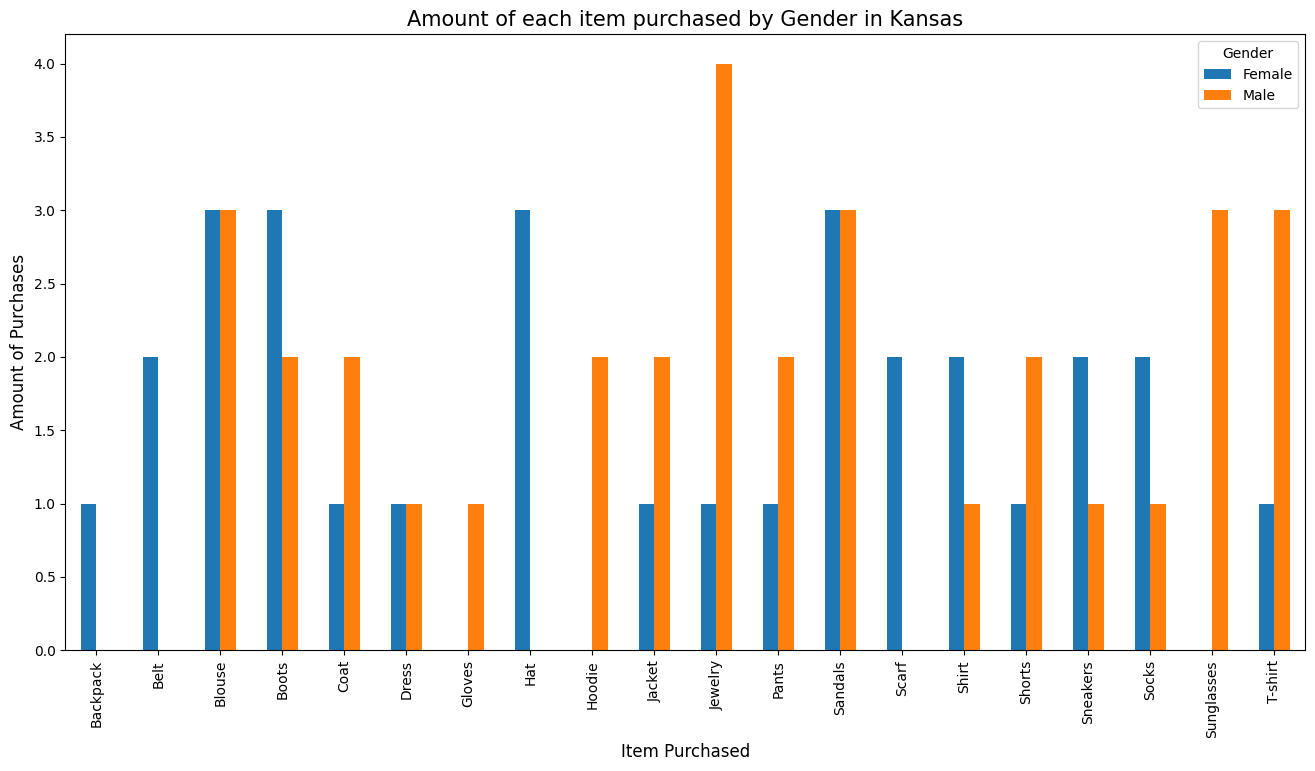

In [57]:
items_purchased_by_gender_kansas = kansas_purchase[(kansas_purchase["Gender"] == "Male") | (kansas_purchase["Gender"] == "Female")]
items_purchased_by_gender_kansas.groupby(["Item Purchased", "Gender"]).size().unstack().plot.bar(figsize = (16,8));
plt.title ("Amount of each item purchased by Gender in Kansas" , fontsize = 15);
plt.xlabel ("Item Purchased" , fontsize = 12);
plt.ylabel ("Amount of Purchases" , fontsize = 12);

### Determine the **frequency of Item Purchased by Gender in Rhode Island** 

#### Determine **All Purchases in Rhode Island**

In [58]:
rhode_island_purchase = shop_trend_df[(shop_trend_df["Location"] == "Rhode Island")]
rhode_island_purchase

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
16,64,Male,Skirt,Clothing,81,Rhode Island,M,Teal,Winter,2.8,Yes,Store Pickup,Yes,Yes,8,PayPal,Monthly
20,66,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
208,62,Male,Gloves,Accessories,91,Rhode Island,M,Silver,Summer,2.9,Yes,Express,Yes,Yes,17,Bank Transfer,Bi-Weekly
228,50,Male,Jeans,Clothing,90,Rhode Island,M,Turquoise,Winter,4.2,Yes,Standard,Yes,Yes,25,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,26,Female,Sandals,Footwear,30,Rhode Island,M,Beige,Spring,3.6,No,Free Shipping,No,No,1,Debit Card,Monthly
3730,28,Female,Boots,Footwear,82,Rhode Island,M,Teal,Spring,4.7,No,2-Day Shipping,No,No,50,Cash,Quarterly
3748,26,Female,Sweater,Clothing,53,Rhode Island,L,Olive,Spring,4.3,No,Store Pickup,No,No,32,Bank Transfer,Bi-Weekly


### Determine **amount of each Item Purchased in Rhode Island**

In [59]:
rhode_island_items_purchase = rhode_island_purchase["Item Purchased"].value_counts()
rhode_island_items_purchase

Dress         6
Pants         5
Shorts        5
Sandals       4
Sweater       4
Jewelry       4
Belt          3
Gloves        3
Boots         3
Shirt         3
Skirt         3
Socks         2
Handbag       2
Blouse        2
Hoodie        2
Backpack      2
Jeans         2
Shoes         1
Sneakers      1
Hat           1
Scarf         1
T-shirt       1
Jacket        1
Sunglasses    1
Coat          1
Name: Item Purchased, dtype: int64